# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

For my project I will be using the Heart Disease Dataset on Kaggle. This dataset consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach and includes 14 attributes. I would like to use these attributes to predict for presence of heart disease, and to find which attributes are closest related to development of heart disease.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

The audience for this project includes both physicians or nurse practitioners and also those interested in machine learning and classification. The value for healthcare diagnosticians is to provide an additional measure of risk and to help guide the decision making process of a patient reporting potential symptoms of heart disease. 

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

In [1]:
heart <- read.csv('heart_cleveland_upload.csv')
heart2 <- read.csv('heart_cleveland_upload.csv')
head(heart)
#read in data, added a 2nd copy without factors for correlation later on

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [2]:
library(tidyr)
library(tree)
library(caret)
library(dplyr)
library(e1071)
install.packages("rpart.plot")
library(rpart)
library(rpart.plot) 

#The libraries I intend to use for the project

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

First, let's begin by delving into a summary of our variables. The variables we have to examine are:

* age
* sex
* cp: chest pain level
* trestbps: resting blood pressure (mmHG)
* chol: cholestoral (mg/dl)
* fbs: fasting blood sugar above 120 mg/dl
* restecg: resting electrocardiograph 
* thalach: max heart rate
* exang: angina induced by exercise
* oldpeak: the difference in ST depression caused by exercise versus rest
* slope: slope of peak exercise ST segment
* ca: number of vessels colored by flouroscopy
* thal: thalassemia blood disorder stage
* target: presence of heart disease

In [3]:
sapply(heart, function(x) sum(is.na(x))) 
sapply(heart, class)

nrow(heart)
summary(heart)

#Great! Looks like we do not have any missing data or null values in our dataset.

age       sex        cp  trestbps      chol       fbs   restecg   thalach 
        0         0         0         0         0         0         0         0 
    exang   oldpeak     slope        ca      thal condition 
        0         0         0         0         0         0

age       sex        cp  trestbps      chol       fbs   restecg   thalach 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
    exang   oldpeak     slope        ca      thal condition 
"integer" "numeric" "integer" "integer" "integer" "integer"

[1] 297

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :2.000   Median :130.0  
 Mean   :54.54   Mean   :0.6768   Mean   :2.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.0  
 Median :243.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :247.4   Mean   :0.1448   Mean   :0.9966   Mean   :149.6  
 3rd Qu.:276.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope              ca        
 

We have 297 observations in the dataset. Our "condition" variable is presence of heart disease. Heart disease is a very general diagnosis that could include many different diseases that affect the heart or blood vesels. From our summary statistics, 46% of our dataset is composed of cases of heart disease. The average age is 54.54 years and 68% of the dataset is male. 

In [4]:
#A lot of our datatypes are integers where they should be factors, let's fix that. 

heart$condition <- as.factor(heart$condition)
heart$sex <- as.factor(heart$sex)
heart$cp <- as.factor(heart$cp)
heart$fbs <- as.factor(heart$fbs)
heart$restecg <- as.factor(heart$restecg)
heart$exang <- as.factor(heart$exang)
heart$slope <- as.factor(heart$slope)
heart$thal <- as.factor(heart$thal)

#Let's also fix the levels to make them more readable for our audience

levels(heart$condition) <- c("noHeartDisease", "HeartDisease")
levels(heart$sex) <- c("Female", "Male")
levels(heart$cp) <- c("typ","atyp","nonang","asymp")
levels(heart$fbs) <- c("<=120", ">120")
levels(heart$restecg) <- c("norm", "STab", "LVht")
levels(heart$exang) <- c("no","yes")
levels(heart$slope) <- c("up","flat","down")
levels(heart$thal) <- c("non","norm","fixed","rever")

# also go ahead and rename attributes to be easier to read
heart <- rename(heart, ChestPain = cp, restBP = trestbps, fastBS = fbs, maxHR = thalach, exAng= exang, flourVessel = ca, thalassemia = thal, heartDisease = condition)

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

Let's start with a basic correlation breakdown between our condition variable, presence of heart disease, and the other attributes in our data. 



,age,condition
,<dbl>,<dbl>
age,1.00000000,0.22707515
sex,-0.09239948,0.27846670
cp,0.11047087,0.40894469
trestbps,0.29047626,0.15349003
chol,0.20264355,0.08028475
fbs,0.13206199,0.00316683
restecg,0.14991651,0.16634349
thalach,-0.39456288,-0.42381706
exang,0.09648880,0.42135549


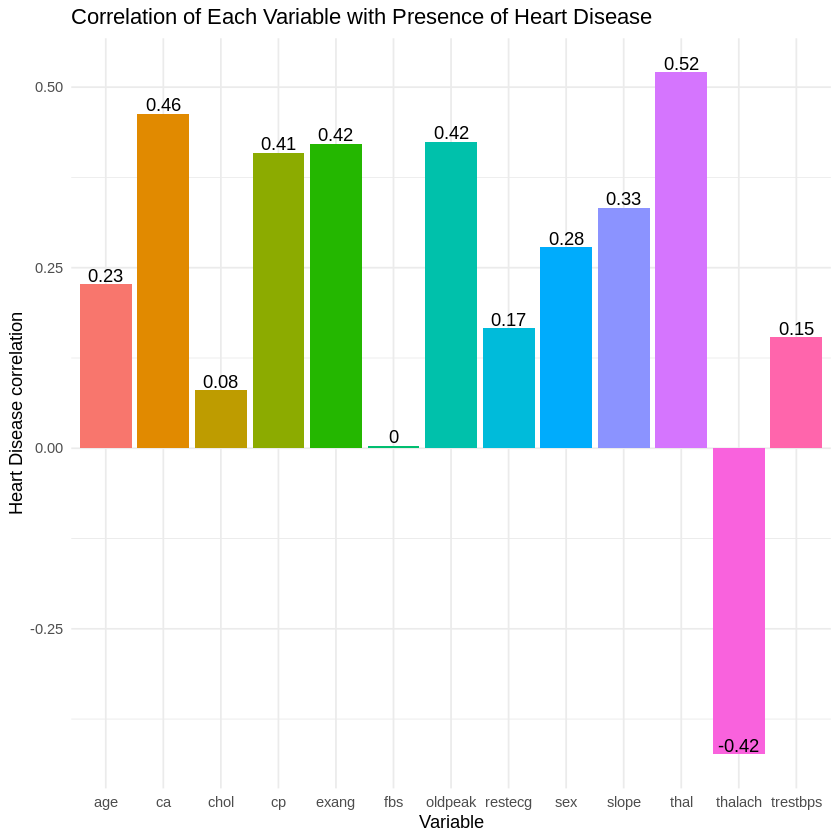

In [5]:
#using original datset without factors

nums <- sapply(heart2, is.numeric)
corHeart <- as.data.frame(cor(heart2[ , nums]))

      
corHeart$indx <- colnames(corHeart)

corHeart <- corHeart[-14, c(1,14)]


corHeart

corbar <- ggplot(corHeart, aes(row.names(corHeart), condition, fill = row.names(corHeart))) + 
    geom_bar(stat = 'identity', show.legend = FALSE) + 
    ylab("Heart Disease correlation") + 
    xlab("Variable") +
    geom_text(aes(label = round(condition, digits = 2), vjust = -0.2)) +
    ggtitle("Correlation of Each Variable with Presence of Heart Disease") +
    theme_minimal()

corbar

From our correlation matrix and subsequent visual it looks like we do not have any singlular strong association with presence of heart disease. Age is positively associated, which makes sense as heart disease appears more often as age increases. The strongest positive correlations are between presence of heart disease and number of flourescent colored vessels, thalassemia status, the difference in exercise induced ST depression (oldpeak), exercise induced angina (chest pain), and chest pain level. The only negative correlation was max heart rate. This also makes intuitive sense as we know max heart rate decreases with both age and poor blood flow.

Let's move on to some modeling.

In [6]:
#Start by seperating test from train. We will be using 70% for training and 30% for testing.

set.seed(1234)
trainer <- sample(seq_len(nrow(heart)), size = sum(nrow(heart)) *.7)

test <- heart[-trainer,]
train <- heart[trainer,]

frmla <- heartDisease ~ .

In [7]:
#Went ahead and removed this output. Was just too illegible. 
#tr <- tree(frmla, data = train)

#summary(tr)
#plot(tr)
#text(tr)


Classification tree:
rpart(formula = heartDisease ~ ., data = train, method = "class", 
    control = rpart.control(minsplit = 6, cp = 0.01))

Variables actually used in tree construction:
[1] age         ChestPain   flourVessel maxHR       slope       thalassemia

Root node error: 100/207 = 0.48309

n= 207 

     CP nsplit rel error xerror     xstd
1 0.490      0      1.00   1.00 0.071896
2 0.090      1      0.51   0.70 0.068065
3 0.050      2      0.42   0.61 0.065593
4 0.035      4      0.32   0.46 0.059815
5 0.020      6      0.25   0.45 0.059344
6 0.010      7      0.23   0.47 0.060273
Call:
rpart(formula = heartDisease ~ ., data = train, method = "class", 
    control = rpart.control(minsplit = 6, cp = 0.01))
  n= 207 

     CP nsplit rel error xerror       xstd
1 0.490      0      1.00   1.00 0.07189633
2 0.090      1      0.51   0.70 0.06806504
3 0.050      2      0.42   0.61 0.06559280
4 0.035      4      0.32   0.46 0.05981453
5 0.020      6      0.25   0.45 0.05934424
6 0.0

The misclassification error rate of the training set is  0.1111111

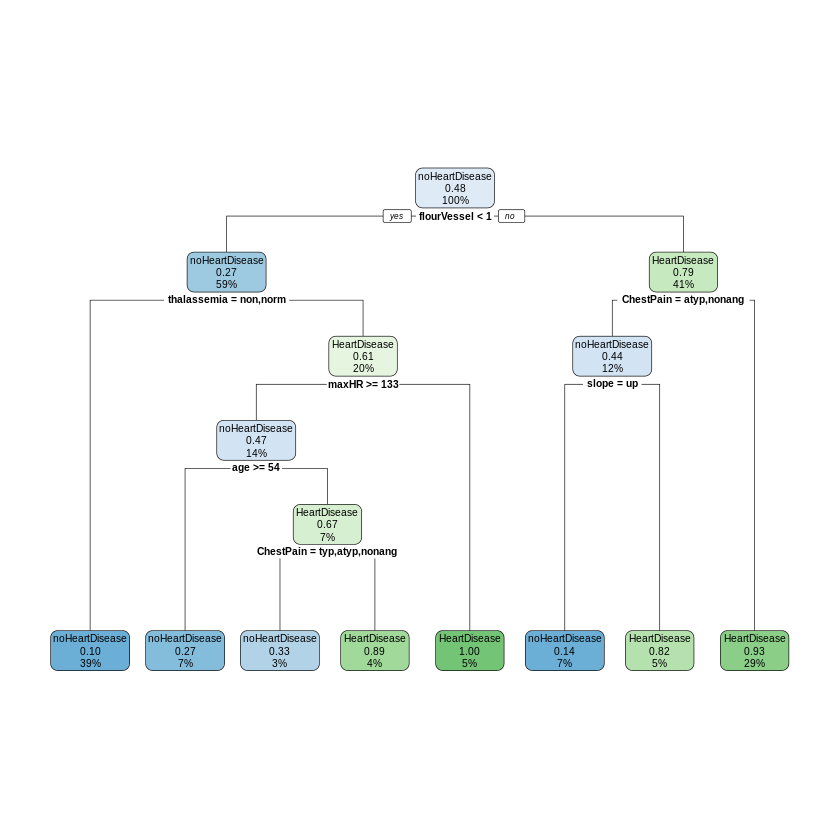

In [8]:
#Fit our model with our training data. Minsplit of 6 and cp of .01 were chosen as this tree had the lowest xerror. 
fit <- rpart(heartDisease ~ ., data = train, method = 'class', control = rpart.control(minsplit = 6, cp = .01))
printcp(fit)
summary(fit)
rpart.plot(fit)

#misclassification of our training dataset
class.pred <- table(predict(fit, type="class"), train$heartDisease)
cat("The misclassification error rate of the training set is ",1-sum(diag(class.pred))/sum(class.pred))

Great, we have a model using our training data. Our decision tree used the following varibles: age, chest pain, number of vessels colored by flouroscopy, max heart rate, slope of ST segment, and thalassemia level. Our misclassification on the training model is .11. I will save an analysis of this chart and the misclassification of the testing model for a little later. 

For now, let's compare our decision tree with naiveBayes. 

In [9]:
m <- naiveBayes(frmla, data = train)
m


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
noHeartDisease   HeartDisease 
     0.5169082      0.4830918 

Conditional probabilities:
                age
Y                    [,1]     [,2]
  noHeartDisease 52.52336 9.914108
  HeartDisease   56.43000 8.485585

                sex
Y                   Female      Male
  noHeartDisease 0.4205607 0.5794393
  HeartDisease   0.1400000 0.8600000

                ChestPain
Y                       typ       atyp     nonang      asymp
  noHeartDisease 0.08411215 0.28971963 0.39252336 0.23364486
  HeartDisease   0.07000000 0.05000000 0.14000000 0.74000000

                restBP
Y                    [,1]     [,2]
  noHeartDisease 128.5234 15.64786
  HeartDisease   133.6600 17.57823

                chol
Y                    [,1]     [,2]
  noHeartDisease 243.8505 56.93373
  HeartDisease   247.6700 47.95496

                fastBS
Y                    <=120   

In [10]:
tab1 <- table(predict(m, train[,-14]), train[,14])
cat("The misclassification error rate of the train set is ", 1 - sum(diag(tab1)) / sum(tab1))

The misclassification error rate of the train set is  0.1545894

Using NaiveBayes, we end up with a slightly higher misclassification error rate of the training set at .15. Let's go ahead and prune our formula to the variables used by our decision tree and feed that into NaiveBayes. 

In [11]:
prunefrmla <- heartDisease ~ age + ChestPain + flourVessel + maxHR + slope + thalassemia
m2 <- naiveBayes(prunefrmla, data = train)
m2

tab2 <- table(predict(m2, train[,-14]), train[,14])
cat("The misclassification error rate of the train set is ", 1 - sum(diag(tab2)) / sum(tab2))


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
noHeartDisease   HeartDisease 
     0.5169082      0.4830918 

Conditional probabilities:
                age
Y                    [,1]     [,2]
  noHeartDisease 52.52336 9.914108
  HeartDisease   56.43000 8.485585

                ChestPain
Y                       typ       atyp     nonang      asymp
  noHeartDisease 0.08411215 0.28971963 0.39252336 0.23364486
  HeartDisease   0.07000000 0.05000000 0.14000000 0.74000000

                flourVessel
Y                     [,1]      [,2]
  noHeartDisease 0.2523364 0.6308643
  HeartDisease   1.1600000 1.0320128

                maxHR
Y                    [,1]     [,2]
  noHeartDisease 160.1682 19.01712
  HeartDisease   139.4700 21.95977

                slope
Y                        up       flat       down
  noHeartDisease 0.67289720 0.27102804 0.05607477
  HeartDisease   0.26000000 0.64000000 0.10000000


The misclassification error rate of the train set is  0.173913

The pruned formula resulted virtually no change in our training misclassification rate which is slightly higher at .17.

In [12]:
#now using our test set
class.pred2 <- table(predict(fit, newdata =test, type="class"), test$heartDisease)
cat("For our decision tree, the misclassification error rate of the test set is ",1-sum(diag(class.pred2))/sum(class.pred2))


tab3 <- table(predict(m, test[,-14]), test[,14])
cat("For NB, unpruned, the misclassification error rate of the test set is ", 1 - sum(diag(tab3)) / sum(tab3))

tab4 <- table(predict(m2, test[,-14]), test[,14])
cat("For NB, pruned, the misclassification error rate of the train set is ", 1 - sum(diag(tab4)) / sum(tab4))

For our decision tree, the misclassification error rate of the test set is  0.2111111For NB, unpruned, the misclassification error rate of the test set is  0.1555556For NB, pruned, the misclassification error rate of the train set is  0.1666667

Using our fitted models on our testing data we result in misclassification error rates of .21 for our decision tree, .16 for naive bayes unpruned, and .17 for naive bayes pruned. 

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

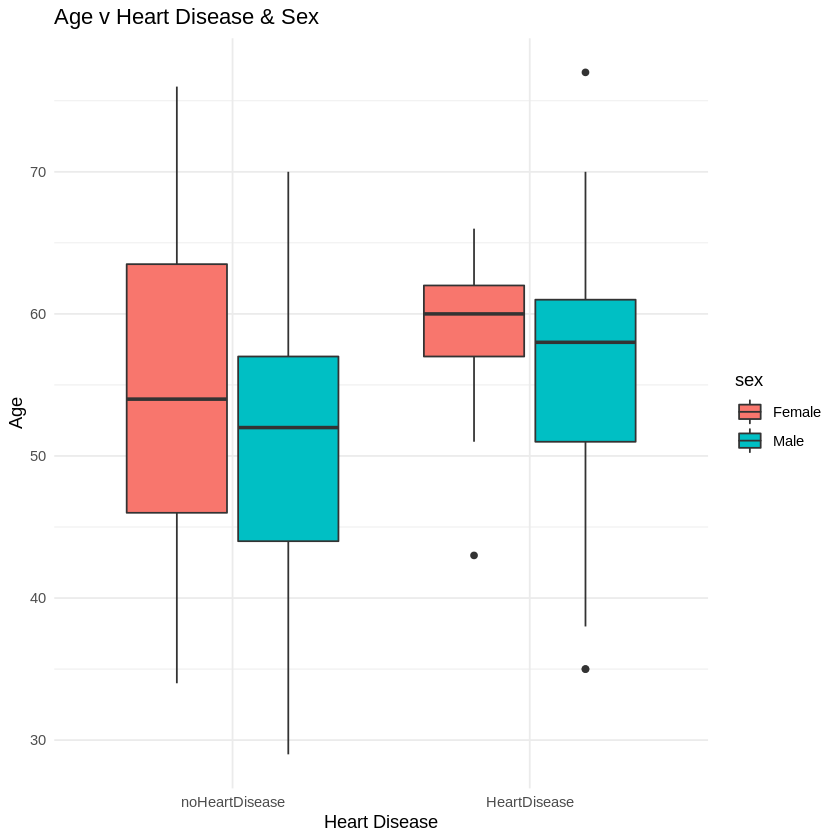

In [13]:
agesexdist <- ggplot(heart, aes(heartDisease, age, fill = sex)) +
    geom_boxplot() +
    xlab("Heart Disease") +
    ylab("Age") +
    ggtitle("Age v Heart Disease & Sex") +
    theme_minimal()

agesexdist


                
                 noHeartDisease HeartDisease
  noHeartDisease             46           12
  HeartDisease                7           25

                
                 noHeartDisease HeartDisease
  noHeartDisease             45            6
  HeartDisease                8           31

                
                 noHeartDisease HeartDisease
  noHeartDisease             43            5
  HeartDisease               10           32

[1] 0.2111111

[1] 0.1555556

[1] 0.1666667

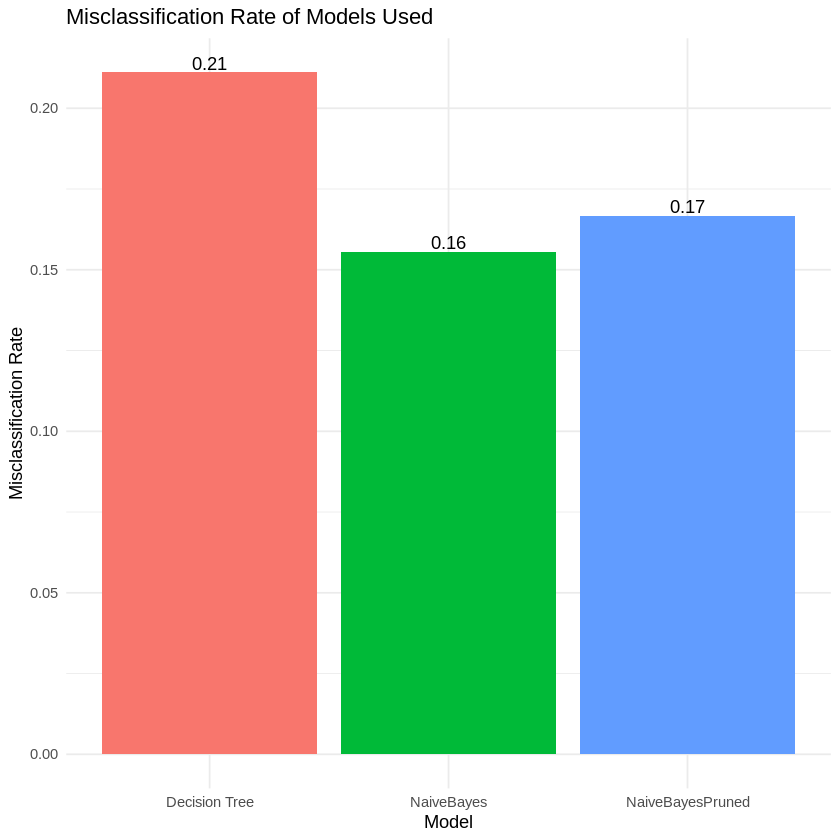

In [14]:
#creating a visual for accuracy
p2<- predict(fit, newdata =test, type="class")
cm <- confusionMatrix(test$heartDisease, p2)
tib <- as_tibble(cm$table)

class.pred2
tab3
tab4


1-sum(diag(class.pred2))/sum(class.pred2)
1 - sum(diag(tab3)) / sum(tab3)
1 - sum(diag(tab4)) / sum(tab4)

misrate <- data.frame(Model = c("Decision Tree","NaiveBayes","NaiveBayesPruned"),
    misclassificationRate = c(1-sum(diag(class.pred2))/sum(class.pred2), 1 - sum(diag(tab3)) / sum(tab3), 1 - sum(diag(tab4)) / sum(tab4)))

misplot <- ggplot(misrate, aes(Model, misclassificationRate, fill = Model)) + geom_bar(stat = 'identity', show.legend = FALSE) +
    geom_text(aes(label = round(misclassificationRate, digits = 2), vjust = -0.2)) +
    ylab("Misclassification Rate") +
    ggtitle("Misclassification Rate of Models Used")+
    theme_minimal() 
misplot

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

Heart disease is responsible for most deaths worldwide for both men and women of most races.The American Heart Association has reported findings that 48.5% of all Americans deal with some form of heart disease. In 2020, nearly 1 of every 5 deaths was due to heart disease which costs the US about $229 billion a year in health care and lost productivity. The treatment of heart disease is incredibly important, but we must also focus on prevention efforts by creating heart healthy focused environments. The purpose of this project is to use the heart disease dataset, a combination four databases: Cleveland, Hungary, Switzerland, and Long Beach, to find which attributes are closest related to presence of heart disease.

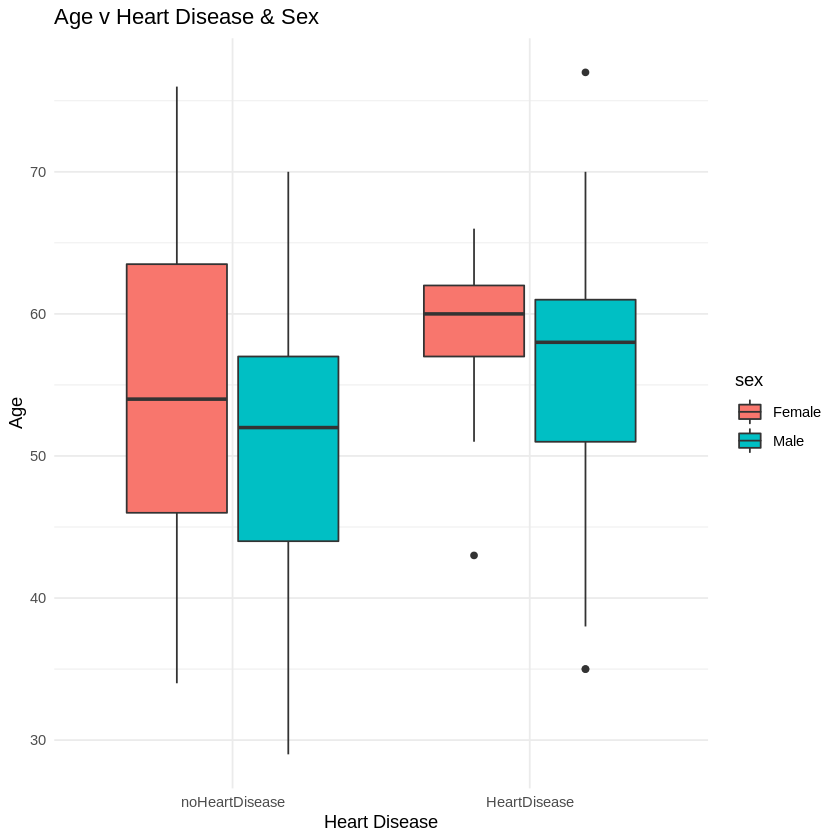

In [15]:
agesexdist

The dataset we are using has 297 observations. Heart disease is a very general diagnosis that could include many different diseases that affect the heart or blood vesels. 46% of our dataset is composed of cases of heart disease. The average age is 54.54 years and 68% of the dataset is male. Looking at the distribution of age by heart disease status and sex shows that women in our sample are older. We can see the interquartile range and median are increased in women, so we know this data is not representative of the public at large. The dataset consists of patients complaining of chest pain, and that would fit with regards to presence of heart disease. Men generally develop heart disease at younger ages, while women are more at risk of heart diseases such as strokes which occur later in life.

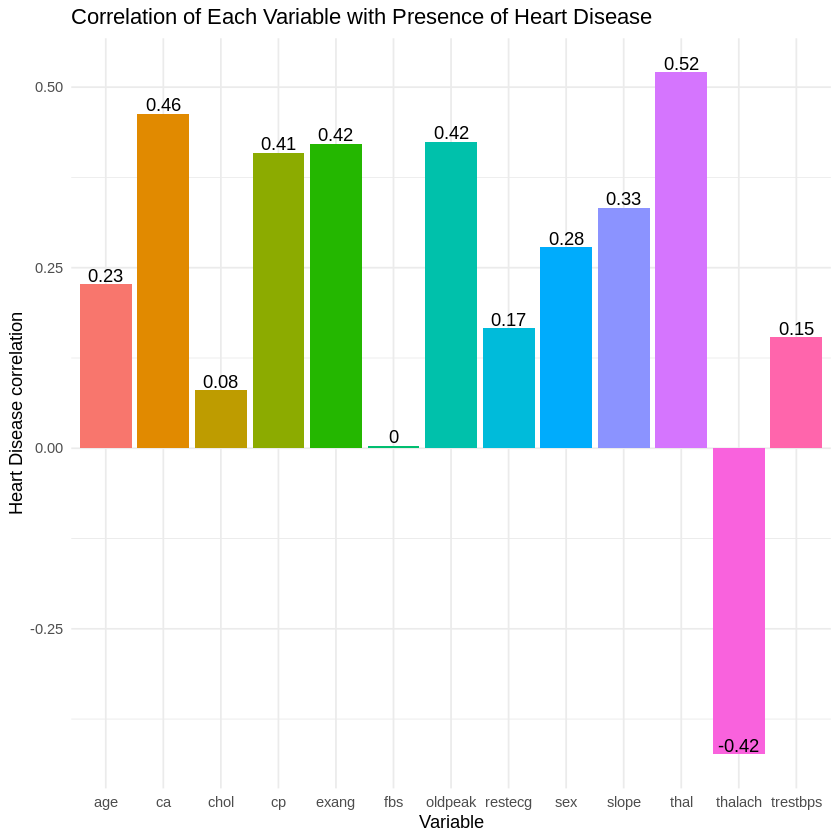

In [16]:
corbar

The above visual is of the correlations between our many attributes and our target varible, heart disease presence. Our attributes are: 

* age
* sex
* cp: chest pain level
* trestbps: resting blood pressure (mmHG)
* chol: cholestoral (mg/dl)
* fbs: fasting blood sugar above 120 mg/dl
* restecg: resting electrocardiograph 
* thalach: max heart rate
* exang: angina induced by exercise
* oldpeak: the difference in ST depression caused by exercise versus rest
* slope: slope of peak exercise ST segment
* ca: number of vessels colored by flouroscopy
* thal: thalassemia blood disorder stage
* target: presence of heart disease

We do not have any singluar strong correlation, but we do have trends we can examine. Age is positively associated, which makes sense as heart disease appears more often as age increases. The strongest positive correlations are between presence of heart disease and number of flourescent colored vessels, thalassemia status, the difference in exercise induced ST depression (oldpeak), exercise induced angina (chest pain), and chest pain level. The only negative correlation was max heart rate. This also makes intuitive sense as we know max heart rate decreases with both age and poor blood flow.

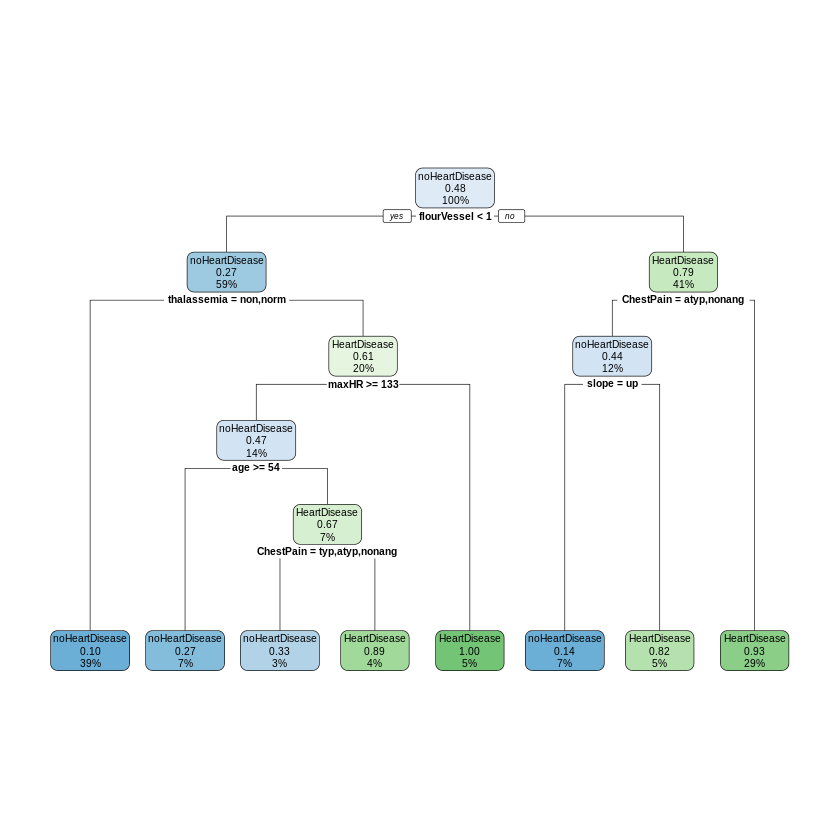

In [17]:
rpart.plot(fit)

This visual is our decision tree, where we used a type of machine learning to classify heart disease based on the rest of our variables. This visualization essentially breaks down the classification into nodes. You can see at the top we start with 100% of our data, where 48% of cases have heart disease. Number of vessels colored with flourescence less than 1 is our first split. Less than one is protective, and our model would predict one to not have heart disease with less than 1 flourescent colored vessel unless thalassemia status is fixed/reversed and max heart rate under 133 OR someone under the age of 54 reporting asymptomatic chest pain. 

Taking a look at the other side of our first split. If the amount of vessels colored by flourescence is 1 or more, then the observation would fall under the "riskier" split as heart disease presence will likely be predicted. If the observation is flourescent colored vessels greater than 1 then the prediction would be heart disease unless both chest pain is either atypical or nonanginal and the slope of the peak ST segment during exercise is upwards.

# How good is our model?

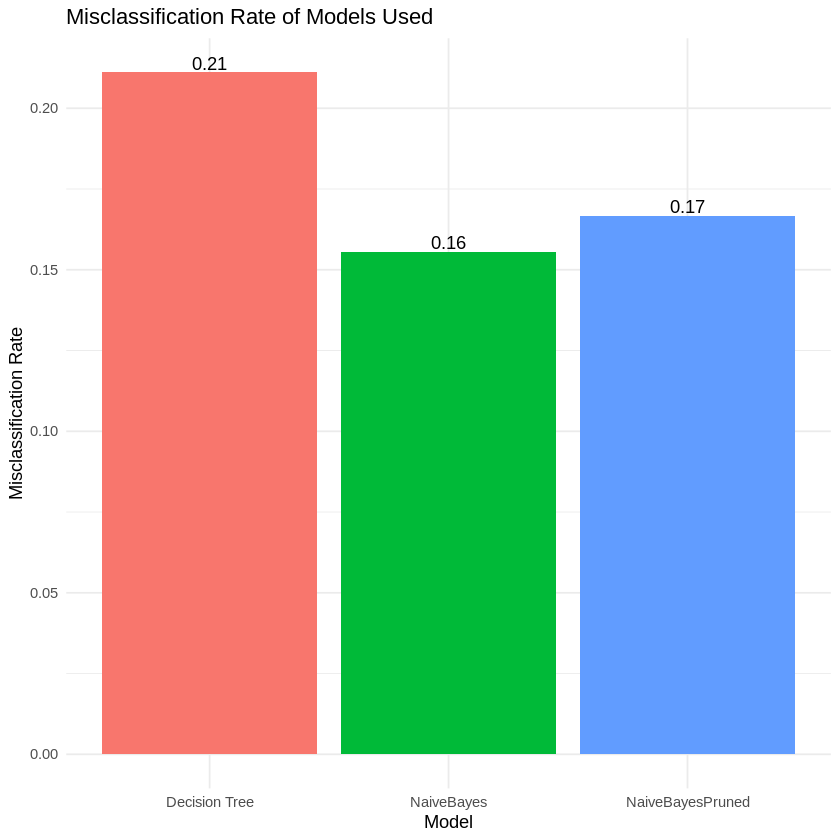

In [18]:
misplot

Three models were built for this project to validate our findings. The above visualization shows the misclassification rate for each model we built tested on seperate data than the training data. The models used include decision tree, naive bayes, and then naive bayes using only the variables deemed cruicial by decision tree. Naive Bayes unpruned peformed best, pruned slightly worse but virtually unchanged, and decision tree performed worst on the test set. 

# What should I do with this information?

The decision tree model could help physicians make streamlined decisions based on risk and available data. With a 21% misclassification rate, we aren't able to instantly declare someone ready for open heart surgery even if their data fits perfectly and indicates as such -- but we should still be able to make better informed decisions on patient risk. For instance, if an individual reports chest pain, we could check how many vessels could be colored via flourescence to get an idea of the patient's risk status. 

This model could be used in conjunction with physician diagnostics as well. For example, a 55 year old male patient reporting typical chest pain during exercise to his general practitioner. The physician checks vitals and no sign of arrythmias, so he/she believes the patient is currently healthy. If the physician wanted to be cautious, he/she could test for thalassemia or run a CT scan to check the number of major vessels able to be colored. 

If an individual "passes" physician diagnostics and their data predicts lack of heart disease, then physicians could focus on adequate lifestyle prevention methods by prescribing exercise and dietary plans instead of focusing on medicinal treatment. 

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>





* 1 & 2: Discriptive statistics were used throughout the project. This module informed how to read in the data and manipulate column names. Summary of discriptive statistics was used to check data and make sure values matched with the dataset log.
3. 3: Data carpentry. Techniques used from this module include subsetting data, selecting columns, and naming factor levels.
4. 4: Database loading/SQL. While I used a file instead of a database, this module was helpful in learning how to import data into jupyterhub as well as the sections of the module that went over data types and changing column names.
5. 5: Visualization. These modules were critical for my project. Ggplot was used throughout this project based on our guidance from this module. I also was introduced to themes in this module and used a theme on my visualizations.
6. 6: Classification. This module may be the most extensively used throughout my project. I used both naive bayes and decision tree to model my data. I originally used the caret tree used in the module, but had to pivot to rpart because my visualization was unreadable. Still, this module provided the framework for the models built and I used rpart using what we learned in caret/tree. 
7. 7: Linear regression. I did not use linear regression in my project, but I did briefly entertain logistic regression. Regardless, this module was cruicial for my understanding of splitting testing and training sets, when to use each, and how to read the summary statistics of a model.
8. 8: Project. Here we are! I learned a ton from working on this project. I feel more confidenct in building models and I can tell my recall on some of the coding has gone up dramatically. I learned the hard way that there is risk in using these public datasets, as the most popular version of this data on Kaggle was very inaccurate compared to the dataset I used which was validated using the actual data from the original study (1025 observations in the popular set! Compared to 297 in the original). Thank you for reading. 

# Save your notebook, then `File > Close and Halt`